In [1]:
import sys
sys.path.append('../..')

import rl.envs
import gymnasium as gym
from stable_baselines3 import PPO
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Load the trained model
print("Loading trained PPO model...")
env = gym.make('FleetEnv-v0')
model = PPO.load('../../ppo', env=env)
print("✅ Model loaded successfully")


Loading trained PPO model...
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


✅ Model loaded successfully


In [3]:
# Evaluate model over multiple episodes
def evaluate_model(model, env, n_episodes=20):
    """Evaluate model and return episode rewards"""
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(n_episodes):
        obs, info = env.reset()
        episode_reward = 0
        episode_length = 0
        
        for step in range(1000):  # Max episode length
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward
            episode_length += 1
            
            if terminated or truncated:
                break
                
        episode_rewards.append(episode_reward)
        episode_lengths.append(episode_length)
        
        if episode % 5 == 0:
            print(f"Episode {episode}: reward={episode_reward:.2f}, length={episode_length}")
    
    return episode_rewards, episode_lengths

print("Evaluating model over 20 episodes...")
rewards, lengths = evaluate_model(model, env, n_episodes=20)
print(f"\n✅ Evaluation complete")
print(f"Mean reward: {np.mean(rewards):.2f} ± {np.std(rewards):.2f}")
print(f"Mean episode length: {np.mean(lengths):.1f}")


Evaluating model over 20 episodes...
Episode 0: reward=0.00, length=1000


Episode 5: reward=0.00, length=1000


Episode 10: reward=0.00, length=1000


Episode 15: reward=0.00, length=1000



✅ Evaluation complete
Mean reward: 0.00 ± 0.00
Mean episode length: 1000.0


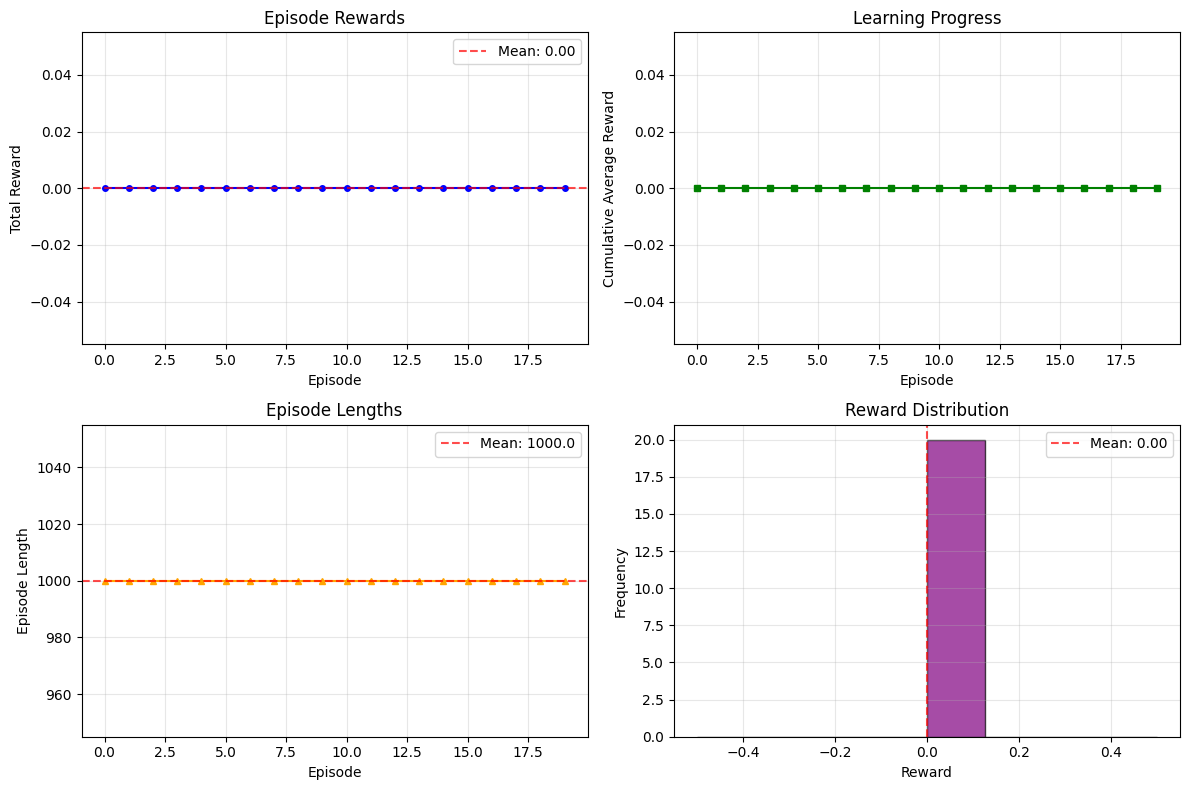

✅ Reward curves plotted and saved as 'fleet_reward_evaluation.png'


In [4]:
# Plot reward curves
plt.figure(figsize=(12, 8))

# Subplot 1: Episode rewards
plt.subplot(2, 2, 1)
plt.plot(rewards, 'b-', marker='o', markersize=4)
plt.axhline(y=np.mean(rewards), color='r', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(rewards):.2f}')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode Rewards')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Cumulative average reward
plt.subplot(2, 2, 2)
cumulative_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
plt.plot(cumulative_avg, 'g-', marker='s', markersize=4)
plt.xlabel('Episode')
plt.ylabel('Cumulative Average Reward')
plt.title('Learning Progress')
plt.grid(True, alpha=0.3)

# Subplot 3: Episode lengths
plt.subplot(2, 2, 3)
plt.plot(lengths, 'orange', marker='^', markersize=4)
plt.axhline(y=np.mean(lengths), color='r', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(lengths):.1f}')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Lengths')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Reward distribution
plt.subplot(2, 2, 4)
plt.hist(rewards, bins=8, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(x=np.mean(rewards), color='r', linestyle='--', alpha=0.7, label=f'Mean: {np.mean(rewards):.2f}')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Reward Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fleet_reward_evaluation.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Reward curves plotted and saved as 'fleet_reward_evaluation.png'")


In [5]:
# Performance summary
print("\n=== Performance Summary ===")
print(f"Episodes evaluated: {len(rewards)}")
print(f"Mean reward: {np.mean(rewards):.2f}")
print(f"Std reward: {np.std(rewards):.2f}")
print(f"Min reward: {np.min(rewards):.2f}")
print(f"Max reward: {np.max(rewards):.2f}")
print(f"Mean episode length: {np.mean(lengths):.1f}")
print(f"Success rate (reward > -50): {sum(1 for r in rewards if r > -50) / len(rewards) * 100:.1f}%")

env.close()
print("\n✅ Evaluation notebook complete")



=== Performance Summary ===
Episodes evaluated: 20
Mean reward: 0.00
Std reward: 0.00
Min reward: 0.00
Max reward: 0.00
Mean episode length: 1000.0
Success rate (reward > -50): 100.0%

✅ Evaluation notebook complete
